##### The MNIST dataset to classify handwritten digits into the correct digits class that they belong to. This dataset consists of a collection of 28x28 grayscale images of handwritten digits (0 through 9) along with their corresponding labels. Each image is a single-channel (grayscale) image with pixel values representing the intensity of the pixels. We wil use this dataset to train and test a machine learning model with the goal of recognizing handwritten digits and correctly identifying the number that is written.

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [14]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
len(X_train)

60000

###### There are 60,000 training images (samples)

In [16]:
len(X_test)

10000

###### There are 10,000 test images (samples)

In [17]:
X_train[0].shape

(28, 28)

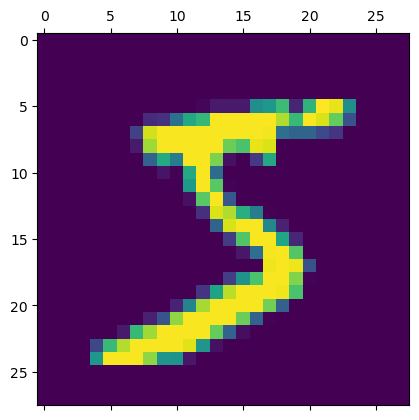

In [18]:
plt.matshow(X_train[0])

In [19]:
y_train[0]

5

In [20]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
#Scaling values between 0 and 1 - this will allow us to improve our accuracy
X_train = X_train/255
X_test = X_test/255

In [23]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
#Let's flatten the 2D array into a 1D array in order to feed it into the input of our neural network. We can do this by reshaping the dataset.

X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [25]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
#Let's create a neural network. We will have 10 output neurons which classifys the digits from 0-9. We'll use a input shape of 784, representing 784 nodes that comes from the flattened array (28x28)
#We will use sigmoid as our activation function (σ(x)= 1/(1+e^-x)) in order to model the probability that a given input digit belongs to a certain class of digits
#Let's use the 'adam' optimizer to update the weights of the neural network during the training process
#We will use the 'sparse_categorical_crossentropy' loss function for multi-class classification
#We will use accuracy as our metric to determine the proportion of correclty predicted digits - simple yet effective
#fit the data using the training values and set epochs to 5(iterations over the entire training dataset)
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\yashanki\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8177 - loss: 0.7132
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9143 - loss: 0.3106
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9182 - loss: 0.2888
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9244 - loss: 0.2718
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9235 - loss: 0.2734


In [27]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9161 - loss: 0.3000


[0.2645162343978882, 0.926800012588501]

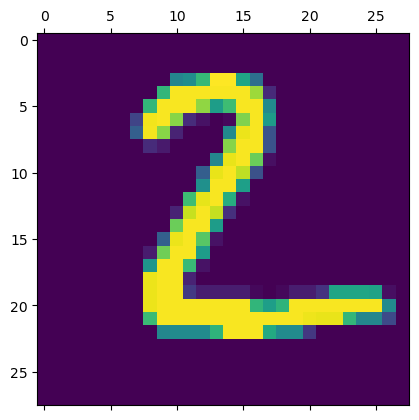

In [28]:
plt.matshow(X_test[1])

In [29]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.5291663e-01, 4.2386735e-03, 9.9933034e-01, 3.3533958e-01,
       3.6719988e-10, 7.0748210e-01, 8.7968928e-01, 1.1578647e-12,
       1.5668963e-01, 1.5636765e-09], dtype=float32)

In [30]:
np.argmax(y_predicted[1])

2

In [31]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [34]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    9,  927,   14,    7,    4,   13,   12,   39,    2],
       [   2,    0,   21,  918,    0,   23,    2,   14,   22,    8],
       [   1,    1,    6,    1,  912,    0,   10,    6,   10,   35],
       [   8,    3,    3,   28,    8,  774,   14,    9,   37,    8],
       [  11,    3,    6,    1,    7,    8,  916,    2,    4,    0],
       [   1,    5,   21,    5,    5,    0,    0,  961,    2,   28],
       [   5,    9,    6,   18,    9,   21,    8,   13,  879,    6],
       [  10,    7,    1,    8,   27,    7,    0,   32,    8,  909]])>

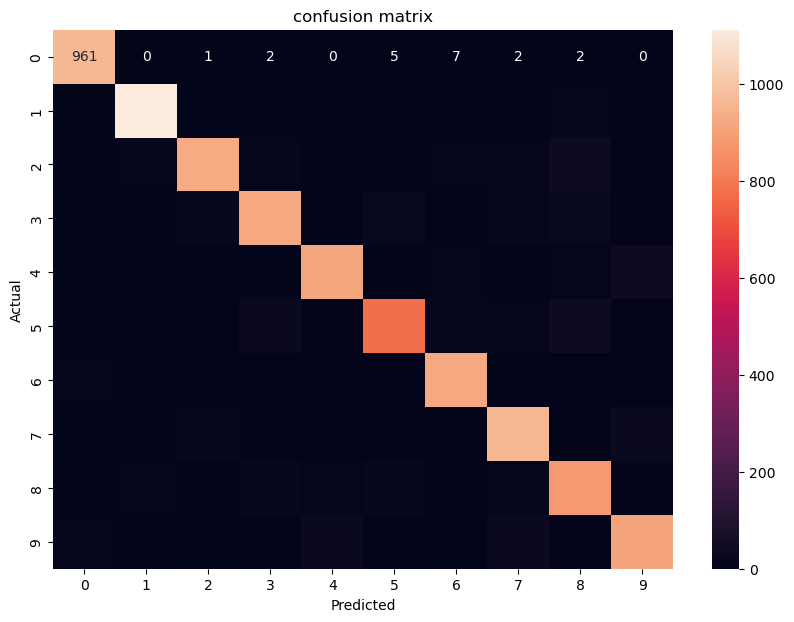

In [36]:
#Let's visualize the accuracy of our predictions using a confusion matrix
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')
plt.show()

##### As we can see from the confusion matrix, a lot of the values that we have predicted, correctly corresponds to their actual values as seen by the orange diagonal line. In each box we see large numbers deonting the correct predictions. The black boxes are the values that we have incorrectly predicted. As we can the model performed relatively well, however there are still some boxes with larger numbers. Let's try to improve our predictions by making some changes to the model.

In [37]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

C:\Users\yashanki\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8667 - loss: 0.4707
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9622 - loss: 0.1304
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9729 - loss: 0.0894
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9818 - loss: 0.0643
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9850 - loss: 0.0508
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9870 - loss: 0.0422
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9906 - loss: 0.0319
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9929 - loss: 0.0241
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9942 - loss: 0.0203
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9953 - loss: 0.0162


In [38]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9717 - loss: 0.0997


[0.0847732201218605, 0.9761000275611877]

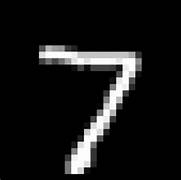

In [45]:
from IPython.display import Image

Image(filename='Downloads/seven.jpg')

In [48]:
from PIL import Image
import io

# Load the uploaded image
with open('Downloads/seven.jpg', 'rb') as image_file:
    image_bytes = image_file.read()
uploaded_image = Image.open(io.BytesIO(image_bytes))

# Preprocess the image
processed_image = uploaded_image.convert('L').resize((28, 28))
processed_image_arr = np.array(processed_image)
processed_image_arr = processed_image_arr / 255.0
processed_image_flattened = processed_image_arr.reshape(1, 28 * 28)

# Make predictions
predicted_digit = np.argmax(model.predict(processed_image_flattened))

print("Predicted digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted digit: 7


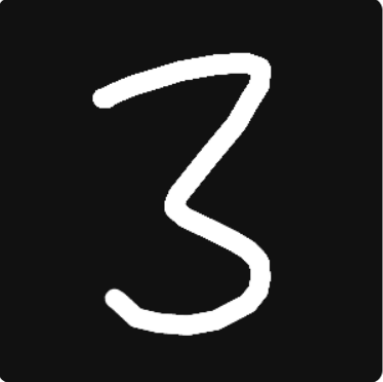

In [47]:
from IPython.display import Image

Image(filename='Downloads/three.png')

In [49]:
from PIL import Image
import io

# Load the uploaded image
with open('Downloads/three.png', 'rb') as image_file:
    image_bytes = image_file.read()
uploaded_image = Image.open(io.BytesIO(image_bytes))

# Preprocess the image
processed_image = uploaded_image.convert('L').resize((28, 28))
processed_image_arr = np.array(processed_image)
processed_image_arr = processed_image_arr / 255.0
processed_image_flattened = processed_image_arr.reshape(1, 28 * 28)

# Make predictions
predicted_digit = np.argmax(model.predict(processed_image_flattened))

print("Predicted digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted digit: 3
